https://www.analyticsvidhya.com/blog/2017/07/introduction-to-genetic-algorithm/

http://hjemmesider.diku.dk/~pisinger/codes.html

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import cufflinks as cf
import numpy as np
import pandas as pd
from evol import Evolution, Population
from pprint import pprint as print

cf.go_offline()

# Typing monkey

In [2]:
np.random.seed(42)

In [3]:
class TypingMonkeyLogger:
    def __init__(self):
        self.generation = 0
        self.iterations = []

    def log(self, population):
        self.generation += 1
        for i in population.evaluate():
            string = i.chromosome
            fitness = i.fitness
            self.iterations.append(
                {"generation": self.generation, "string": string, "fitness": fitness}
            )

In [6]:
objective = "To be or not to be"

In [7]:
lower_case_letters = set(range(ord("a"), ord("z") + 1))
upper_case_letters = set(range(ord("A"), ord("Z") + 1))
punctuation = set([ord(" "), ord(".")])
characters = np.array(list(lower_case_letters.union(upper_case_letters).union(punctuation)))

In [8]:
def fitness(string):
    reference = np.array(list(objective))
    candidate = np.array(list(string))
    return np.sum(reference == candidate) / len(objective)

In [9]:
def random_candidate():
    return "".join([chr(i) for i in np.random.choice(characters, size=len(objective), replace=True)])

In [10]:
def select(population):
    top_10 = sorted(population, key=lambda x: x.fitness)[:-10]
    parent1, parent2 = np.random.choice(top_10, size=2)
    return parent1, parent2

In [11]:
def crossover(*parents):
    parent1, parent2 = parents
    m = np.random.randint(0, len(objective))
    child = f"{parent1[:m]}{parent2[m:]}"
    return child

In [12]:
def mutate(string):
    toss = np.random.exponential()
    if toss > 0.5:
        i = np.random.randint(0, len(objective))
        random_letter = chr(np.random.choice(characters))
        string_to_list = list(string)
        string_to_list[i] = random_letter
        return "".join(string_to_list)
    return string

In [13]:
logger = TypingMonkeyLogger()
pop = Population.generate(
    init_function=random_candidate, eval_function=fitness, size=200
)
evolution = (
    Evolution()
    .survive(fraction=0.2)
    .breed(parent_picker=select, combiner=crossover)
    .callback(logger.log)
    .mutate(mutate_function=mutate)
)

In [14]:
%%time
pop.evolve(evolution, 100)

Wall time: 5.5 s


<Population with size 200 at 2948232996120>

In [15]:
pop.evaluate()

<Population with size 200 at 2948232996400>

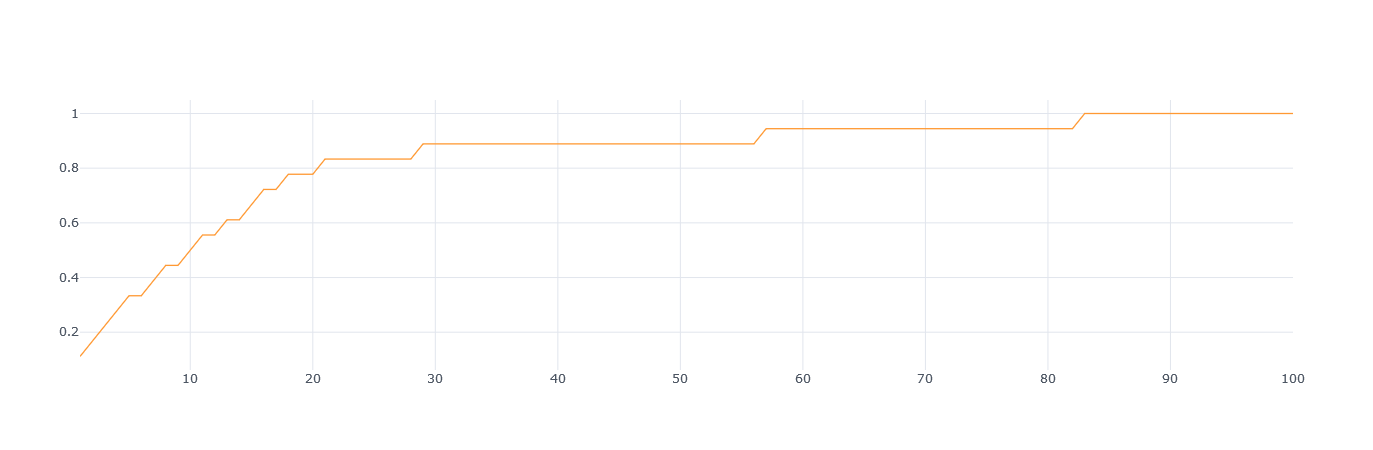

In [16]:
df = pd.DataFrame(logger.iterations)
df.groupby("generation").agg("max").iplot(kind="scatter", y="fitness")

In [26]:
df.groupby("generation", as_index=False).agg("max")

,generation,fitness,string
0,1,0.111111,zTCehsRQgxoOqofGX.
1,2,0.166667,zTCehsRQgxp.Kl.Rai
2,3,0.222222,ze YBYTJTOHz TXPvL
3,4,0.277778,yGGlO WolngNXtxu.
4,5,0.333333,xopwKJcrKlnGStxu.
5,6,0.333333,xopwKzcrKlnGStxu.
6,7,0.388889,xopwKJcr uvS txuG
7,8,0.444444,xoyVeucr dpgUIA Ss
8,9,0.444444,xoyVeucr dKbJwodba
9,10,0.500000,xDyVe zr woO Co vt
